## Quantum Computing and Quantum Machine Learning, Project 1

### Part a) Setting up Circuits and States

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
plt.rcParams.update({
    'font.size': 12,
    "figure.figsize":(8,6),
    "axes.grid": True,
    "grid.color": "#cccccc",
    "grid.linestyle": "--",
    "axes.prop_cycle": plt.cycler(color=['#0f7e92', '#b90636', '#11793e', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
})


#Write a function which sets up a one-qubit basis
def one_qubit_basis() -> np.array: 
    q0 = np.array([1,0])
    q1 = np.array([0,1])
    return q0, q1
#defining a function that returns the Bell states
def bell_state() -> np.array:
    q0, q1 = one_qubit_basis()
    s00 = np.kron(q0,q0)
    s01 = np.kron(q0,q1)
    s10 = np.kron(q1,q0)
    s11 = np.kron(q1,q1)

    q00 = (s00 + s11)/np.sqrt(2)
    q01 = (s01 + s10)/np.sqrt(2)
    q10 = (s00 - s11)/np.sqrt(2)
    q11 = (s01 - s10)/np.sqrt(2)

    return q00, q01, q10, q11


def σ_x() -> np.array:
    """
    Returns the Pauli-X matrix.
    """
    return np.array([[0,1],[1,0]])

def σ_y() -> np.array:
    """
    Returns the Pauli-Y matrix.
    """
    return np.array([[0,-1j],[1j,0]])

def σ_z() -> np.array:
    """
    Returns the Pauli-Z matrix.
    """
    return np.array([[1,0],[0,-1]])


def Hadamard() -> np.array:
    """
    Returns the Hadamard gate.
    """
    return 1/np.sqrt(2)*np.array([[1,1],[1,-1]])

def Phase() -> np.array:
    """
    Returns the Phase gate.
    """
    return np.array([[1,0],[0,1j]])

def cnot() -> np.array:
    """
    Returns the CNOT gate.
    """
    return np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])

q0, q1 = one_qubit_basis()
print("|0⟩:",q0)
print("|1⟩:",q1)

#Pauli matrices
sigma_x = σ_x()
sigma_y = σ_y()
sigma_z = σ_z()

# Applying Pauli matrices to the basis
q0_sigma_x = sigma_x@q0
q1_sigma_x = sigma_x@q1
print("\nσ_x|0⟩:",q0_sigma_x)
print("σ_x|1⟩:",q1_sigma_x)

q0_sigma_y = sigma_y@q0
q1_sigma_y = sigma_y@q1
print("σ_y|0⟩:",q0_sigma_y)
print("σ_y|1⟩:",q1_sigma_y)

q0_sigma_z = sigma_z@q0
q1_sigma_z = sigma_z@q1
print("σ_z|0⟩:",q0_sigma_z)
print("σ_z|1⟩:",q1_sigma_z)

# Create Hadamar and Phase gates
H = Hadamard()
S = Phase()

#Apply Hadamard and Phase gates to the basis
q0_H = H@q0
q1_H = H@q1
print("\nH|0⟩:",q0_H)
print("H|1⟩:",q1_H)

q0_S = S@q0
q1_S = S@q1
print("\nP|0⟩:",q0_S)
print("P|1⟩:",q1_S)


#Define CNOT gate
CNOT = cnot()


#Create Bell state out of q0 with Hadamard and CNOT
q0_H = H@q0
q1_H = H@q1
bell00 = CNOT@np.kron(q0_H,q0)
bell10 = CNOT@np.kron(q1_H,q0) 
bell01 = CNOT@np.kron(q0_H,q1)
bell11 = CNOT@np.kron(q1_H,q1)

bs00,bs01,bs10,bs11 = bell_state()  

print("\nBell states:") 
print("Bell state |00⟩:",bell00)
print("Bell state |01⟩:",bell01)
print("Bell state |10⟩:",bell10)
print("Bell state |11⟩:",bell11)
print("\nDouble check Bell states:")
print("Bell state |00⟩:",bs00)
print("Bell state |01⟩:",bs01)
print("Bell state |10⟩:",bs10)
print("Bell state |11⟩:",bs11)


|0⟩: [1 0]
|1⟩: [0 1]

σ_x|0⟩: [0 1]
σ_x|1⟩: [1 0]
σ_y|0⟩: [0.+0.j 0.+1.j]
σ_y|1⟩: [0.-1.j 0.+0.j]
σ_z|0⟩: [1 0]
σ_z|1⟩: [ 0 -1]

H|0⟩: [0.70710678 0.70710678]
H|1⟩: [ 0.70710678 -0.70710678]

P|0⟩: [1.+0.j 0.+0.j]
P|1⟩: [0.+0.j 0.+1.j]

Bell states:
Bell state |00⟩: [0.70710678 0.         0.         0.70710678]
Bell state |01⟩: [0.         0.70710678 0.70710678 0.        ]
Bell state |10⟩: [ 0.70710678  0.          0.         -0.70710678]
Bell state |11⟩: [ 0.          0.70710678 -0.70710678  0.        ]

Double check Bell states:
Bell state |00⟩: [0.70710678 0.         0.         0.70710678]
Bell state |01⟩: [0.         0.70710678 0.70710678 0.        ]
Bell state |10⟩: [ 0.70710678  0.          0.         -0.70710678]
Bell state |11⟩: [ 0.          0.70710678 -0.70710678  0.        ]


In [117]:
#Apply Hadamard, then CNOT to the Bell states
bell00_H = np.kron(H,np.eye(2))@bell00
bell01_H = np.kron(H,np.eye(2))@bell01
bell10_H = np.kron(H,np.eye(2))@bell10
bell11_H = np.kron(H,np.eye(2))@bell11

print("\nBell states after Hadamard gate:")
print("Bell state |00⟩:",bell00_H)
print("Bell state |01⟩:",bell01_H)
print("Bell state |10⟩:",bell10_H)
print("Bell state |11⟩:",bell11_H)

bell00_HCNOT = CNOT@bell00_H
bell01_HCNOT = CNOT@bell01_H
bell10_HCNOT = CNOT@bell10_H
bell11_HCNOT = CNOT@bell11_H

print("\nBell states after Hadamard and CNOT gates:")
print("Bell state |00⟩:",bell00_HCNOT)
print("Bell state |01⟩:",bell01_HCNOT)
print("Bell state |10⟩:",bell10_HCNOT)
print("Bell state |11⟩:",bell11_HCNOT)



Bell states after Hadamard gate:
Bell state |00⟩: [ 0.5  0.5  0.5 -0.5]
Bell state |01⟩: [ 0.5  0.5 -0.5  0.5]
Bell state |10⟩: [ 0.5 -0.5  0.5  0.5]
Bell state |11⟩: [-0.5  0.5  0.5  0.5]

Bell states after Hadamard and CNOT gates:
Bell state |00⟩: [ 0.5  0.5 -0.5  0.5]
Bell state |01⟩: [ 0.5  0.5  0.5 -0.5]
Bell state |10⟩: [ 0.5 -0.5  0.5  0.5]
Bell state |11⟩: [-0.5  0.5  0.5  0.5]


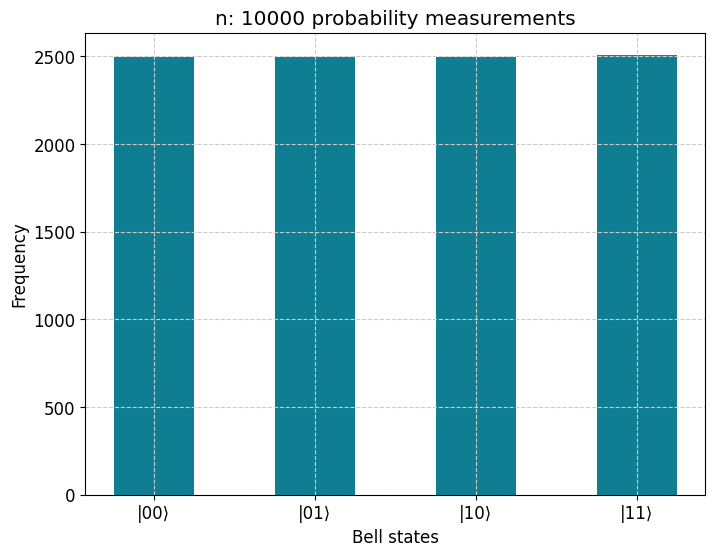

In [118]:
#Make repeated measurements on the first qubit, then the second qubit

def bell_measurements(n, bell_state):#11793e
    """
    Measurements on Bell state "|ψ⟩ = α|00⟩ + β|01⟩ + γ|10⟩ + δ|11⟩":
    |00⟩ - α : idx0
    |01⟩ - β : idx1
    |10⟩ - γ : idx2
    |11⟩ - δ : idx3
    """
    α, β, γ, δ = np.abs(bell_state)**2
    q0_probs = [α + β, γ + δ] #probabilities for being in |0⟩ or |1⟩
    
    results = np.zeros(n)
    for i in range(n):

        q0_measure = np.random.choice(2, p=q0_probs) #returns either 0 or 1
        if q0_measure == 0:
            #if q0-> |0⟩, then complete measurement is either |00⟩ or |01⟩
            q1_prob = [α/(α+β), β/(α+β)] #probabilities for |plt.rcparams.update({'figure.figsize': [12,6]})00⟩ or |01⟩, normalized
            q1_measure = np.random.choice(2, p=q1_prob)
            results[i] = q1_measure
        else:
            #if q0-> |1⟩, then complete measurement is either |10⟩ or |11⟩
            q1_prob = [γ/(γ+δ), δ/(γ+δ)] #probabilities for |10⟩ or |11⟩, normalized
            q1_measure = np.random.choice(2, p=q1_prob)
            results[i] = q1_measure + 2 #shifts the index to 2 or 3


    return results


n = 10000
results = bell_measurements(n, bell00_HCNOT)

plt.hist(results, bins = np.arange(5)-0.5,rwidth=0.5)
plt.xticks(range(4), ["|00⟩", "|01⟩", "|10⟩", "|11⟩"])
plt.title(f"n: {n} probability measurements")
plt.ylabel("Frequency")
plt.xlabel("Bell states")
plt.show()



Qiskit measurements: {'11': 2540, '10': 2366, '00': 2521, '01': 2573}


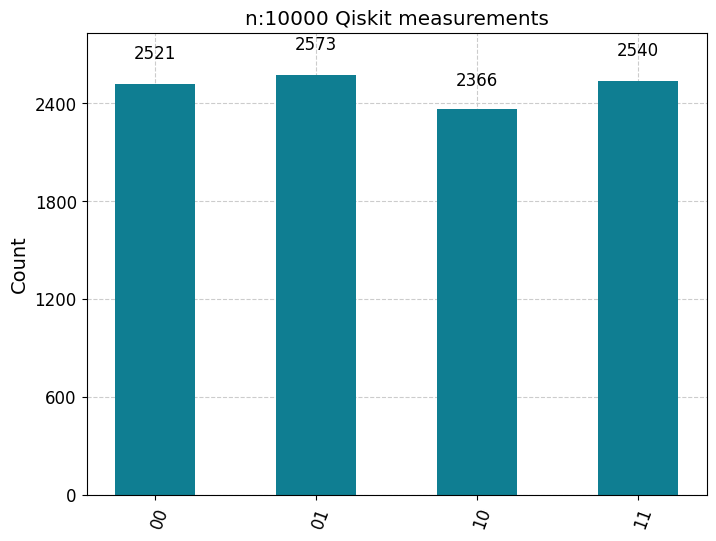

In [119]:
#Compare results with Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

#Create a quantum circuit
qc = QuantumCircuit(2,2)
#Apply Hadamard gate to q0, and q1
qc.h(0)
qc.h(1)

#Apply CNOT gate
qc.cx(0,1) 

#Measure qubits
qc.measure(0,0)# measure q0, and store the result in the first classical bit
qc.measure(1,1)# measure q1, and store the result in the second classical bit

#Simulate the quantum circuit
n = 10000
simulator = AerSimulator()
transpiled_qc = transpile(qc, simulator)
result = simulator.run(transpiled_qc,shots=n).result()
counts = result.get_counts()
print("Qiskit measurements:",counts)

plot_histogram(counts, title=f"n:{n} Qiskit measurements")

### Part b) Eigenvalue problem

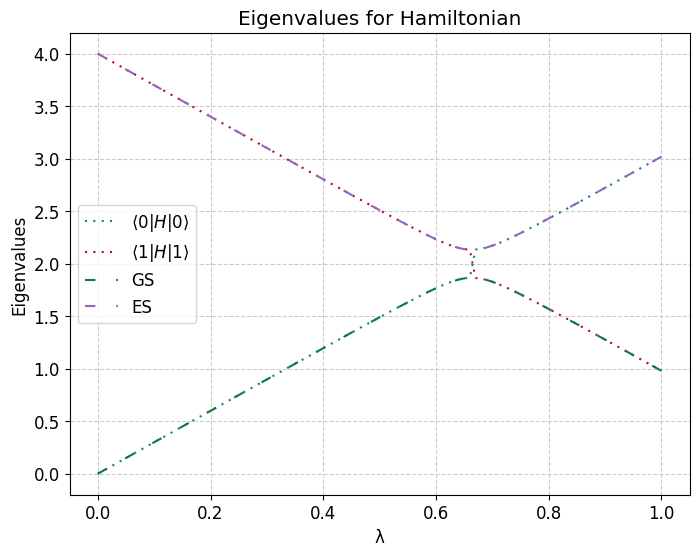

In [120]:
#Define values
E_1 = 0
E_2 = 4
V_11 = 3
V_22 = -V_11
V_12 = 0.2
V_21 = V_12

squigly_E = (E_1 + E_2)/2
Omega = (E_1 - E_2)/2

c = (V_11 + V_22)/2
omega_z = (V_11 - V_22)/2
omega_x = V_12

H_0 = squigly_E*np.eye(2) + Omega*σ_z()
H_1 = c*np.eye(2) + omega_z*σ_z() + omega_x*σ_x()


def Hamiltonian(lam: float) -> np.array:
    """
    0 <= lam <= 1\n
    returns the Hamiltonian for a given value of lambda
    """
    return H_0 + lam*H_1



def solve_eigenvalues(lam: float) -> np.array:
    """
    0 <= lam <= 1\n
    returns the eigenvalues for a given value of lambda
    """
    eigvals, eigvecs = np.linalg.eig(Hamiltonian(lam))
    return eigvals, eigvecs

lam = np.linspace(0,1,101)
eigenvalues = []
eigenvectors = []

for i in lam:
    eigvals, eigvecs = solve_eigenvalues(i)
    eigenvalues.append(eigvals)
    eigenvectors.append(eigvecs)

gs,es = [],[]
for i in range(len(eigenvalues)):
    gs.append(min(eigenvalues[i]))
    es.append(max(eigenvalues[i]))


plt.plot(lam,eigenvalues,linestyle = (0,(1,3))) 
plt.plot(lam,gs,linestyle = (0,(5,10)))
plt.plot(lam,es,linestyle = (0,(5,10)))
plt.xlabel("λ")
plt.ylabel("Eigenvalues")
plt.title("Eigenvalues for Hamiltonian")
plt.legend([f"$⟨0|H|0⟩$",f"$⟨1|H|1⟩$","GS","ES"])
plt.show()






### Part c) VQE

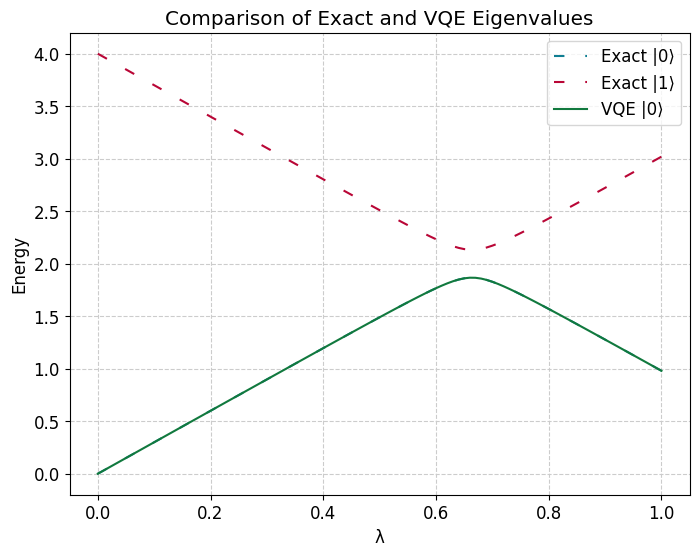

In [121]:

def R_x(theta: float) -> np.array:
    """
    Returns the rotation matrix around the x-axis
    """
    return np.cos(theta/2)*np.eye(2) - 1j*np.sin(theta/2)*σ_x()

def R_y(phi: float) -> np.array:
    """
    Returns the rotation matrix around the y-axis
    """
    return np.cos(phi/2)*np.eye(2) - 1j*np.sin(phi/2)*σ_y()

def variational_basis(state: float,theta: float, phi:float) -> np.array:
    """
    Returns the variational basis for a given state
    """
    return R_y(phi)@R_x(theta)@state

def variational_energy(theta: float, phi: float,lam: float,state:float) -> float:
    """
    Returns the variational energy for a given theta and phi
    """
    psi = variational_basis(state,theta,phi)
    return np.real(psi.conj().T@Hamiltonian(lam)@psi)   



vqe_energies = []
eta = 0.1
Niterations = 100
theta = 2*np.pi*np.random.rand()
phi = 2*np.pi*np.random.rand()
lambdas = np.linspace(0,1,101)
state = q0
for l in lambdas:
    for i in range(Niterations):
        theta_grad = 0.5 * (variational_energy(theta+np.pi/2,phi,l,state) - variational_energy(theta-np.pi/2,phi,l,state))
        phi_grad = 0.5 * (variational_energy(theta,phi+np.pi/2,l,state) - variational_energy(theta,phi-np.pi/2,l,state))
        theta -= eta*theta_grad
        phi -= eta*phi_grad
    vqe_energies.append(variational_energy(theta,phi,l,state))



plt.plot(lam, gs, label="Exact |0⟩",linestyle = (0,(5,10)))
plt.plot(lam, es, label="Exact |1⟩",linestyle = (0,(5,10)))
plt.plot(lam, vqe_energies, label="VQE |0⟩")
plt.xlabel("λ")
plt.ylabel("Energy")
plt.title("Comparison of Exact and VQE Eigenvalues")
plt.legend()
plt.show()

### Part d) 2 bit basis

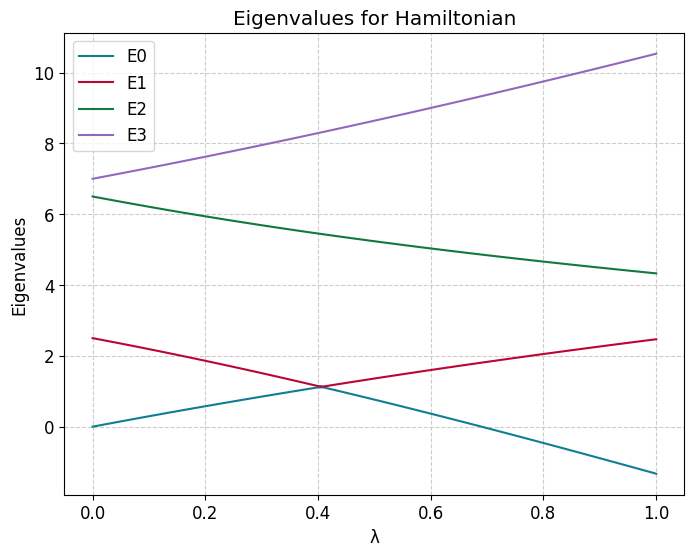

In [122]:
q00 = np.array([1,0,0,0])
q01 = np.array([0,1,0,0])
q10 = np.array([0,0,1,0])
q11 = np.array([0,0,0,1])

H0 = np.diag([0.0, 2.5, 6.5, 7.0])

#tensor product of pauli matrices
σ_xσ_x = np.kron(σ_x(),σ_x())
σ_zσ_z = np.kron(σ_z(),σ_z())
#Hamiltonian
Hx = 2.0
Hz = 3.0
Hi = Hx*σ_xσ_x + Hz*σ_zσ_z

def Hamiltonian(lam: float) -> np.array:
    """
    returns the Hamiltonian for a given value of lambda
    """
    return H0 + lam * Hi

#Compute eigenvalues
lam_vals = np.linspace(0,1,101)
eigenvalues = []
eigenvectors = []
for lam in lam_vals:
    eigvals, eigvecs = np.linalg.eigh(Hamiltonian(lam))
    eigenvalues.append(eigvals)
    eigenvectors.append(eigvecs)

plt.plot(lam_vals, eigenvalues)

plt.legend(["E0","E1","E2","E3"])
plt.xlabel("λ")
plt.ylabel("Eigenvalues")
plt.title("Eigenvalues for Hamiltonian")
plt.show()



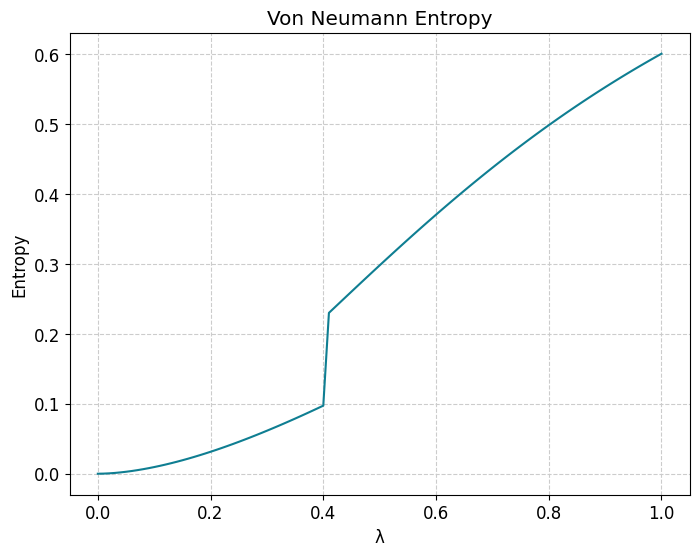

In [123]:
#Von Neumann entropy
def von_neumann_entropy(rho: np.array) -> float:
    """
    Returns the von Neumann entropy for a given density matrix
    """
    eigvals = np.linalg.eigvalsh(rho)
    eps = 1e-8 #Avoid log(0)
    return -np.sum(eigvals*np.log2(eigvals+eps))


def density_matrix(state: np.array) -> np.array:
    """
    Returns the density matrix for a given state
    """
    return np.outer(state, state.conj())

def partial_trace(state: np.array,index: int) -> np.array:
    """
    Returns the partial trace of a density matrix
    """
    density = density_matrix(state)
    q0, q1 = one_qubit_basis()
    I = np.eye(2)
    if index == 0:
        P0 = np.kron(q0, I)
        P1 = np.kron(q1, I)
    elif index == 1:
        P0 = np.kron(I, q0)
        P1 = np.kron(I, q1)
    else:
        raise ValueError("Index must be 0 or 1")

    return P0.conj() @ density @ P0.T + P1.conj() @ density @ P1.T

lam_vals = np.linspace(0,1,101)
eigenvalues = np.zeros((len(lam_vals),4))
eigenvectors = np.zeros((len(lam_vals),4,4),dtype=complex)

entropies = np.zeros(len(lam_vals))

for i,l in enumerate(lam_vals):
    eigvals, eigvecs = np.linalg.eigh(Hamiltonian(l))
    eigenvalues[i] = eigvals
    eigenvectors[i] = eigvecs
    dens_a = partial_trace(eigvecs[:,0],0)
    dens_b = partial_trace(eigvecs[:,0],1)
    
    entropies[i] = von_neumann_entropy(dens_a) 

plt.plot(lam_vals, entropies)
plt.xlabel("λ")
plt.ylabel("Entropy")
plt.title("Von Neumann Entropy")
plt.show()



### Part e) More VQE

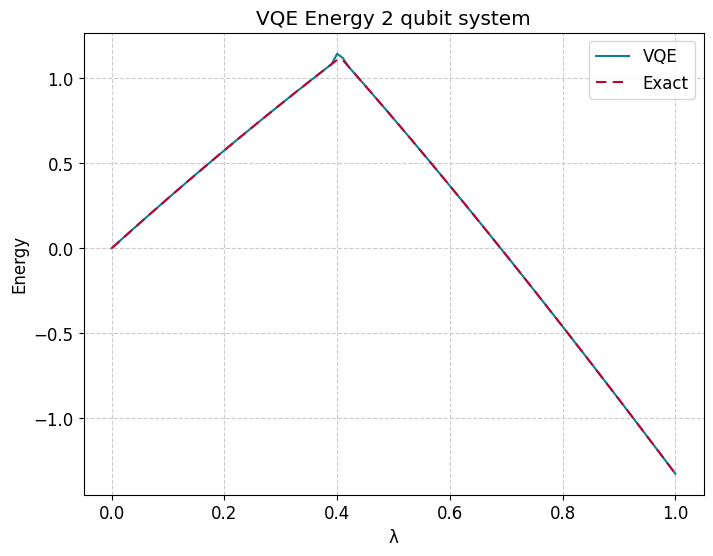

In [124]:
# import itertools

def ansatz_circuit(params: np.array) -> np.array:
    """
    Returns the state by the ansatz circuit
    """
    theta0, theta1, phi0, phi1 = params
    state = q00


    state = CNOT @ np.kron(R_y(phi0),R_y(phi1)) @ np.kron(R_x(theta0),R_x(theta1)) @ state

    return state

def exp_val(params: np.array, lam: float) -> float:
    """
    Returns the expectation value for a given set of parameters and lambda
    """
    psi = ansatz_circuit(params)
    return np.real(psi.conj().T @ Hamiltonian(lam) @ psi)

lam_vals = np.linspace(0,1,101)

vqe_energies = np.zeros(len(lam_vals))


eta = 0.1

Niterations = 1000
pi_2 = np.pi/2
for i,l in enumerate(lam_vals):
    params = np.random.rand(4)*np.pi
    for j in range(Niterations):

        grad = np.zeros(4)
        eta = 0.1 / (1 + 0.001 * j)
        for idx in range(len(params)):
            angles = params.copy()
            angles[idx] += pi_2
            E_plus = exp_val(angles,l)
            angles[idx] -= np.pi
            E_minus = exp_val(angles,l)
            grad[idx] = (E_plus - E_minus)/2

        params -= eta*grad


    vqe_energies[i] = exp_val(params,l)



plt.plot(lam_vals, vqe_energies)
plt.plot(lam_vals,eigenvalues[:,0],linestyle = (0,(5,3))) 
plt.legend(["VQE","Exact"])
plt.xlabel("λ")
plt.ylabel("Energy")
plt.title("VQE Energy 2 qubit system")
plt.show()

### Part f&g) Lipkin model

In [152]:
Z = σ_z()
X = σ_x()
Y = σ_y()
I = np.eye(2)

def tensor_product(matrices):
    """
    Compute the tensor product of a list of 2x2 matrices.
    Args:
        matrices (list): List of 2x2 numpy arrays.
    Returns:
        result (np.array): Tensor product of the matrices.
    """
    result = matrices[0]
    for mat in matrices[1:]:
        result = np.kron(result, mat)
    return result

#### J=1

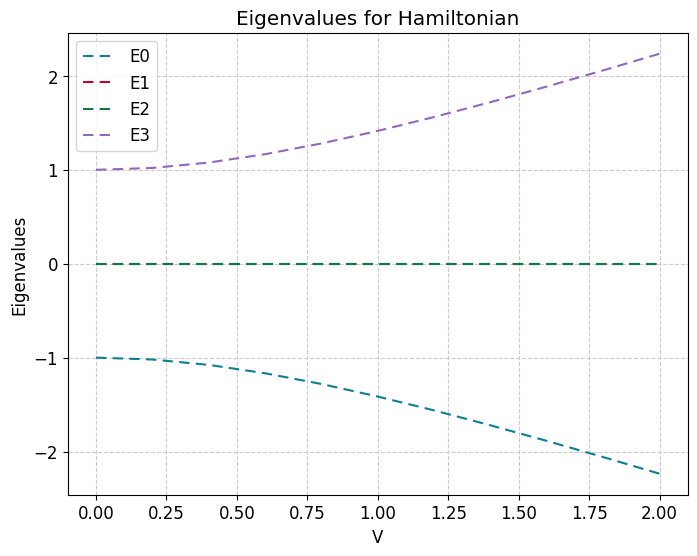

In [170]:
def Hamiltonian_Pauli(eps:float,V:float) -> np.array:
    """
    Returns the Hamiltonian for a given value of lambda
    """
    ZI = np.kron(Z,I)
    ZZ = np.kron(Z,Z)
    XI = np.kron(X,I)
    XZ = np.kron(X,Z)
    return -eps/2 * (ZI + ZZ) - V/2 *(XI + XZ) 

epsilon = 1.0
V = np.linspace(0,2,11)
eigenvalues = np.zeros((len(V),4))

for i,v in enumerate(V):
    eigvals, eigvecs = np.linalg.eigh(Hamiltonian_Pauli(epsilon,v))
    eigenvalues[i] = eigvals

plt.plot(V, eigenvalues,linestyle = (0,(5,3)))
plt.xlabel("V")
plt.ylabel("Eigenvalues")
plt.title("Eigenvalues for Hamiltonian")
plt.legend(["E0","E1","E2","E3"])
plt.show()


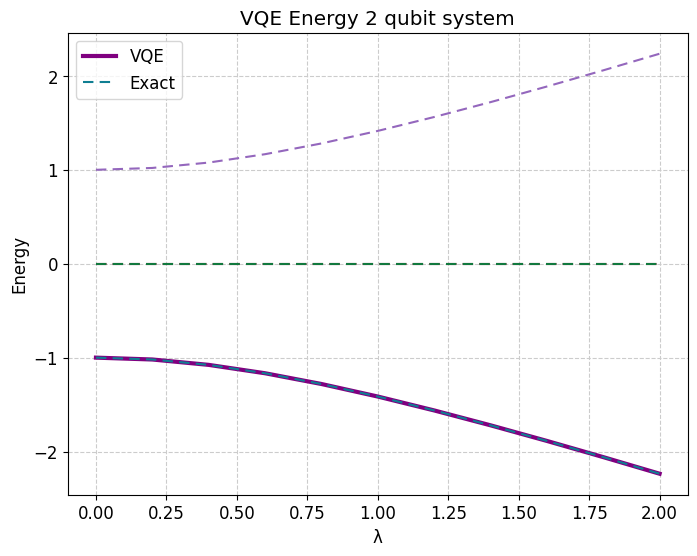

In [154]:
def pauli_ansatz_j1(params: np.array) -> np.array:
    """
    Returns the state by the ansatz circuit
    Suited for J=1 4x4 Hamiltonian
    """
    theta0, theta1, theta2, theta3 = params
    state = q00
    # Apply rotations and CNOT gates
    state = np.kron(R_y(theta0), R_y(theta1)) @ state
    state = CNOT @ state
    state = np.kron(R_x(theta2), R_x(theta3)) @ state
    state = CNOT @ state
    return state

def exp_val_j1_pauli(params: np.array, V: float, eps: float) -> float:
    """
    Returns the expectation value for a given set of parameters and V, epsilon
    """
    psi = pauli_ansatz_j1(params)
    return np.real(psi.conj().T @ Hamiltonian_Pauli(eps,V) @ psi)

def cost_function (params: np.array, V: float, eps: float) -> float:
    return exp_val_j1_pauli(params,V,eps)

Vvals = np.linspace(0,2,11)

pauli_j1_VQE = np.zeros(len(Vvals))


eta = 0.1

Niterations = 1000
pi_2 = np.pi/2
for i,v in enumerate(Vvals):
    params = np.random.rand(4)*np.pi

    results = minimize(cost_function,params,args=(v,1.0),method='BFGS',tol=1e-8)
    pauli_j1_VQE[i] = results.fun




plt.plot(Vvals, pauli_j1_VQE, linewidth=3,color="purple")    
plt.plot(Vvals,eigenvalues,linestyle = (0,(5,3))) 
plt.legend(["VQE","Exact"])
plt.xlabel("λ")
plt.ylabel("Energy")
plt.title("VQE Energy 2 qubit system")
plt.show()

#### J=2

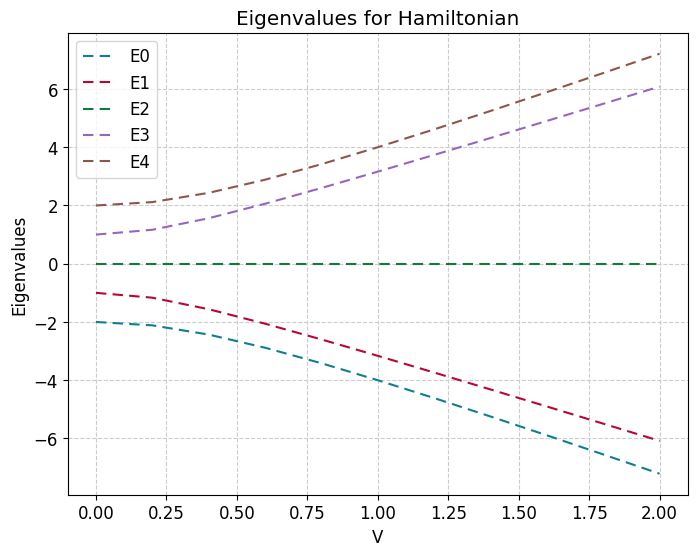

In [161]:
def Block1(eps:float,V:float) -> np.array:
    B1 = np.zeros((4,4),dtype=complex)
    ZI = np.kron(Z,I)
    ZZ = np.kron(Z,Z)

    IX = np.kron(I,X)
    ZX = np.kron(Z,X)

    XX = np.kron(X,X)
    YY = np.kron(Y,Y)

    B1 = -eps * (ZI + ZZ) + V/2*np.sqrt(6) * (IX + ZX + XX + YY)
    return np.real(B1) 

def Block2(eps:float,V:float) -> np.array:
    B2 = np.zeros((2,2),dtype=complex)
    B2 = -eps*Z + 3*V*X

    return np.real(B2)

def Hamiltonian_PauliJ2 (eps:float,V:float) -> np.array:
    H = np.zeros((5,5),dtype=complex)
    
    H3x3 = Block1(eps,V)
    H2x2 = Block2(eps,V)

    idx3x3 = np.array([0,2,4])
    idx2x2 = np.array([1,3])

    for i,row in enumerate(idx3x3):
        for j,col in enumerate(idx3x3):
            H[row][col] = H3x3[i][j]
    
    for i,row in enumerate(idx2x2):
        for j,col in enumerate(idx2x2):
            H[row][col] = H2x2[i][j]
    return H


epsilon = 1.0
V = np.linspace(0,2,11)
eigenvalues = np.zeros((len(V),5))

for i,v in enumerate(V):
    eigvals, eigvecs = np.linalg.eigh(Hamiltonian_PauliJ2(epsilon,v))
    eigenvalues[i] = eigvals

plt.plot(V, eigenvalues,linestyle = (0,(5,3)))
plt.xlabel("V")
plt.ylabel("Eigenvalues")
plt.title("Eigenvalues for Hamiltonian")
plt.legend(["E0","E1","E2","E3","E4"])
plt.show()

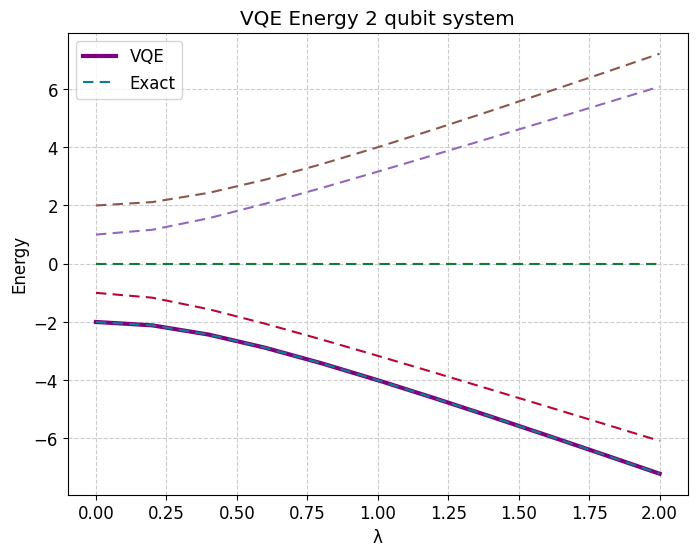

In [157]:
# VQE

def pauli_ansatz_j2(params: np.array) -> np.array:
    """
    Returns the state by the ansatz circuit
    Suited for J=2 5x5 Hamiltonian
    """
    theta0, theta1, theta2, theta3, theta4, theta6 = params
    state = np.kron(q00,np.eye(2))[0]

    Ry1 = tensor_product([R_y(theta0),np.eye(2),np.eye(2)])
    Ry2 = tensor_product([np.eye(2),R_y(theta1),np.eye(2)])
    Ry3 = tensor_product([np.eye(2),np.eye(2),R_y(theta2)])
    CNOT12 = np.kron(CNOT,np.eye(2))
    CNOT23 = np.kron(np.eye(2),CNOT)

    state = CNOT23 @ CNOT12 @ Ry3 @ Ry2 @ Ry1 @ state
    Ry4 = tensor_product([R_y(theta3),np.eye(2),np.eye(2)])
    Ry5 = tensor_product([np.eye(2),R_y(theta4),np.eye(2)])
    Ry6 = tensor_product([np.eye(2),np.eye(2),R_y(theta6)])
    state = Ry6 @ Ry5 @ Ry4 @ state
    return state[:5]

def exp_val_j2_pauli(params: np.array, V: float, eps : float) -> float:
    """
    Returns the expectation value for a given set of parameters and V, epsilon
    """
    psi = pauli_ansatz_j2(params)
    return np.real(psi.conj().T @ Hamiltonian_PauliJ2(eps,V) @ psi)

def cost_function_j2 (params: np.array, V: float, eps: float) -> float:
    return exp_val_j2_pauli(params,V,eps)



Vvals = np.linspace(0,2,11)
pauli_j2_VQE = np.zeros(len(Vvals))
eta = 0.1
Niterations = 1000
for i,v in enumerate(Vvals):
    params = np.random.rand(6)*np.pi

    results = minimize(cost_function_j2,params,args=(v,1.0),method='BFGS',tol=1e-8)
    pauli_j2_VQE[i] = results.fun


plt.plot(Vvals, pauli_j2_VQE,linewidth=3,color="purple")
plt.plot(Vvals,eigenvalues,linestyle = (0,(5,3)))
plt.legend(["VQE","Exact"])
plt.xlabel("λ")
plt.ylabel("Energy")
plt.title("VQE Energy 2 qubit system")
plt.show()